In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import tree
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Descriptive Statistics

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


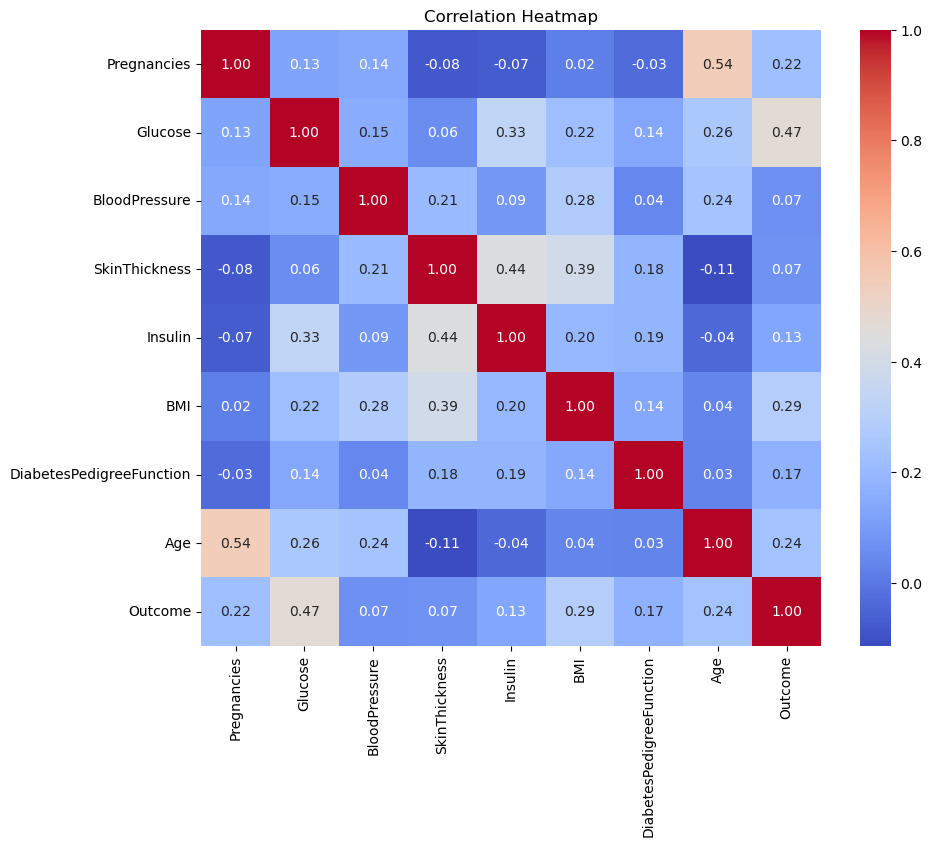

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

- SkinThickness and Pregnancies, Insulin and Pregnancies ,DiabetesPedigreeFunction and Pregnancies are negatively correclated.
- Pregnancies, Glucose, BloodPressure , Insulin ,SkinThickness, BMI have minimum values as 0.0

In [12]:
t=['Glucose','BloodPressure' ,'SkinThickness','Insulin','BMI']
for i in t:
    df[i]=df[i].replace(0,df[i].mean())

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Missing Values

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

-  Dataset has No Missing values.

<AxesSubplot: >

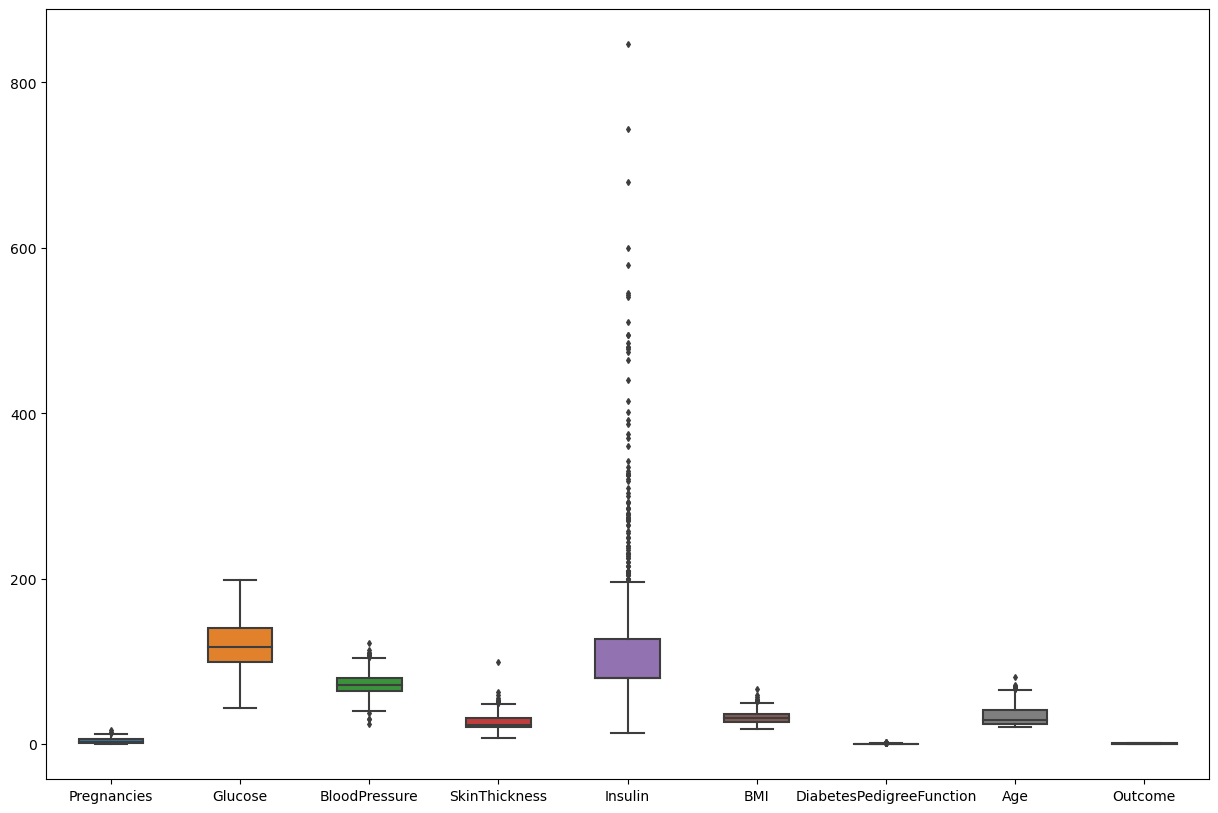

In [15]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

- Outliers present in Insulin are More.

# Train Test split

In [17]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape,x_test.shape

((576, 8), (192, 8))

# Feature Scaling

In [23]:
def scaler_std(x_train,x_test):
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled=scaler.transform(x_test)
    file=open('std_scaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    return x_train_scaled,x_test_scaled

In [24]:
x_train_scaled,x_test_scaled=scaler_std(x_train,x_test)

# Box Plots to understand Effect of Standard Scaler

/tmp/ipykernel_1524/1050641592.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after scaling')

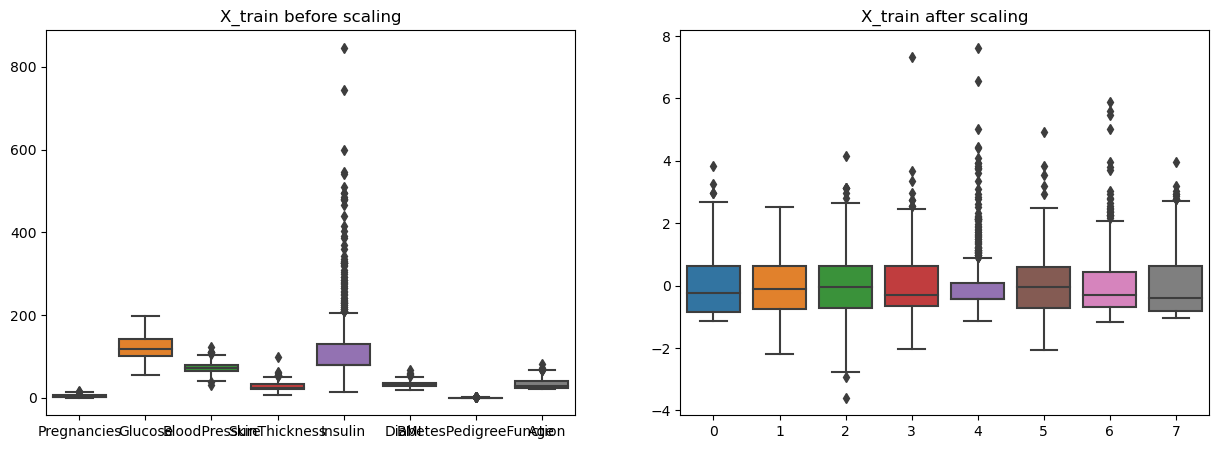

In [25]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('X_train after scaling')

- By Standard Scaling , distribution of outliers are even in the features.

# Decision TREE

In [31]:
parameter={
    'criterion':['gini', 'entropy','log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt', 'log2']
}

In [32]:
classifier=DecisionTreeClassifier()

In [33]:
dt_grid=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy',verbose=3)
dt_grid.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.612 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.652 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.643 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.643 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.638 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitte

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [34]:
print(dt_grid.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'random'}


In [35]:
classifier2=DecisionTreeClassifier(criterion='gini',max_depth=3,max_features='log2',splitter='random')

In [36]:
classifier2.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3, max_features='log2', splitter='random')

In [37]:
y_pred_dt=classifier2.predict(x_test_scaled)

In [40]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       130
           1       0.57      0.34      0.42        62

    accuracy                           0.70       192
   macro avg       0.65      0.61      0.61       192
weighted avg       0.68      0.70      0.68       192



In [41]:
print(confusion_matrix(y_test,y_pred_dt))

[[114  16]
 [ 41  21]]
